## Customer Analytics

In [160]:
#load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [161]:
#load dataset
df = pd.read_csv('transaction_data.csv')

In [162]:
#display the dataframe
df.head(5)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,10.56,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,64.80,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,10.20,United Kingdom


In [163]:
df['InvoiceDate'].max()

'Wed Sep 26 13:29:00 IST 2018'

In [164]:
df = df.iloc[:5000, :]

In [165]:
df.isnull().sum()

UserId                     0
invoiceNo                  0
InvoiceDate                0
ItemCode                   0
ItemDescription           12
NumberOfItemsPurchased     0
CostPerItem                0
AmountSpent                0
Country                    0
dtype: int64

In [166]:
#To drop null values
df.dropna(inplace=True)

In [167]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.date())

In [168]:
df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3.52,10.56,United Kingdom
2,267099,6385599,2019-02-15,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,64.80,France


In [169]:
df.columns

Index(['UserId', 'invoiceNo', 'InvoiceDate', 'ItemCode', 'ItemDescription',
       'NumberOfItemsPurchased', 'CostPerItem', 'AmountSpent', 'Country'],
      dtype='object')

In [170]:
#Converting the datatypes
df['UserId'] = df['UserId'].astype(int)
df['invoiceNo'] = df['invoiceNo'].astype(int)
df['ItemCode'] = df['ItemCode'].astype(int)
df['NumberOfItemsPurchased'] = df['NumberOfItemsPurchased'].astype(int)
df['CostPerItem'] = df['CostPerItem'].astype(int)
df['AmountSpent'] = df['AmountSpent'].astype(int)
df['Country'] = df['Country'].astype(str)


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   UserId                  4988 non-null   int32 
 1   invoiceNo               4988 non-null   int32 
 2   InvoiceDate             4988 non-null   object
 3   ItemCode                4988 non-null   int32 
 4   ItemDescription         4988 non-null   object
 5   NumberOfItemsPurchased  4988 non-null   int32 
 6   CostPerItem             4988 non-null   int32 
 7   AmountSpent             4988 non-null   int32 
 8   Country                 4988 non-null   object
dtypes: int32(6), object(3)
memory usage: 272.8+ KB


<AxesSubplot:>

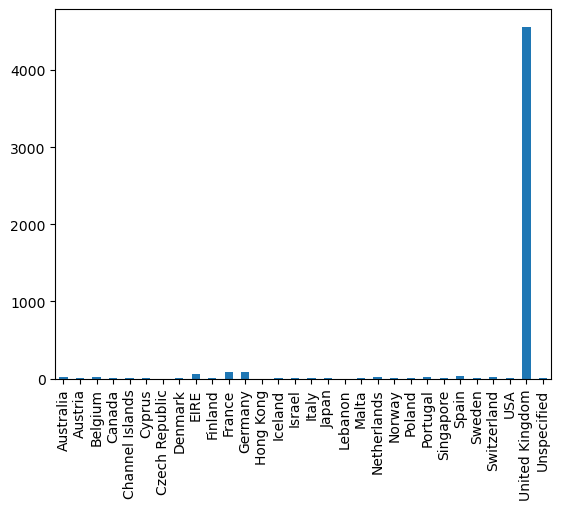

In [172]:
df['Country'].value_counts().sort_index().plot(kind='bar')

In [173]:
df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11,70,United Kingdom
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3,10,United Kingdom
2,267099,6385599,2019-02-15,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0,64,France


In [174]:
df.describe()

,UserId,invoiceNo,ItemCode,NumberOfItemsPurchased,CostPerItem,AmountSpent
count,4988.000000,4.988000e+03,4.988000e+03,4988.000000,4988.000000,4988.000000
mean,244510.136929,6.163310e+06,6.502524e+05,30.134723,6.273657,74.516239
std,140678.726096,1.478452e+05,4.461307e+05,95.936457,92.917679,372.769749
min,-1.000000,5.900103e+06,-1.000000e+00,-612.000000,0.000000,-18771.000000
25%,261051.000000,6.033145e+06,4.605878e+05,3.000000,1.000000,15.000000
50%,303387.000000,6.171396e+06,4.751985e+05,9.000000,2.000000,41.000000
75%,343287.000000,6.294502e+06,4.883392e+05,36.000000,5.000000,73.000000
max,383943.000000,6.397435e+06,1.894494e+06,3060.000000,6257.000000,10771.000000


In [175]:
#To remove the negative in amountspent and other columns 
df['AmountSpent'] = df['AmountSpent'].abs()
df['UserId'] = df['UserId'].abs()
df['ItemCode'] = df['ItemCode'].abs()
df['invoiceNo'] = df['invoiceNo'].abs()
df['NumberOfItemsPurchased'] = df['NumberOfItemsPurchased'].abs()

In [176]:
df.describe()

,UserId,invoiceNo,ItemCode,NumberOfItemsPurchased,CostPerItem,AmountSpent
count,4988.000000,4.988000e+03,4.988000e+03,4988.000000,4988.000000,4988.000000
mean,244510.615277,6.163310e+06,6.502524e+05,31.516840,6.273657,85.966119
std,140677.894522,1.478452e+05,4.461307e+05,95.491241,92.917679,370.296386
min,1.000000,5.900103e+06,1.000000e+00,3.000000,0.000000,0.000000
25%,261051.000000,6.033145e+06,4.605878e+05,3.000000,1.000000,16.000000
50%,303387.000000,6.171396e+06,4.751985e+05,12.000000,2.000000,41.000000
75%,343287.000000,6.294502e+06,4.883392e+05,36.000000,5.000000,73.000000
max,383943.000000,6.397435e+06,1.894494e+06,3060.000000,6257.000000,18771.000000


In [177]:
#To save dataset in csv
#df.to_csv('clean_dataset.csv', header = True, index=False)

In [178]:
#import the csv file saved
df = pd.read_csv('clean_dataset.csv')

In [179]:
df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11,70,United Kingdom
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3,10,United Kingdom
2,267099,6385599,2019-02-15,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0,64,France


In [180]:
#To determine total unique values in each columns
df.nunique()

UserId                    1745
invoiceNo                 3685
InvoiceDate                305
ItemCode                  1791
ItemDescription           1886
NumberOfItemsPurchased      76
CostPerItem                 54
AmountSpent                354
Country                     30
dtype: int64

In [181]:
df_country = df.groupby(['Country'])[['UserId']].nunique()
#to rename column names
df_country.columns = ['no_of_customers']
df_country = df_country.sort_values('no_of_customers', ascending=False)
df_country

,no_of_customers
Country,
United Kingdom,1563
France,43
Germany,42
Spain,17
Belgium,11
Portugal,11
Switzerland,10
Italy,5
Channel Islands,5


<AxesSubplot:xlabel='Country'>

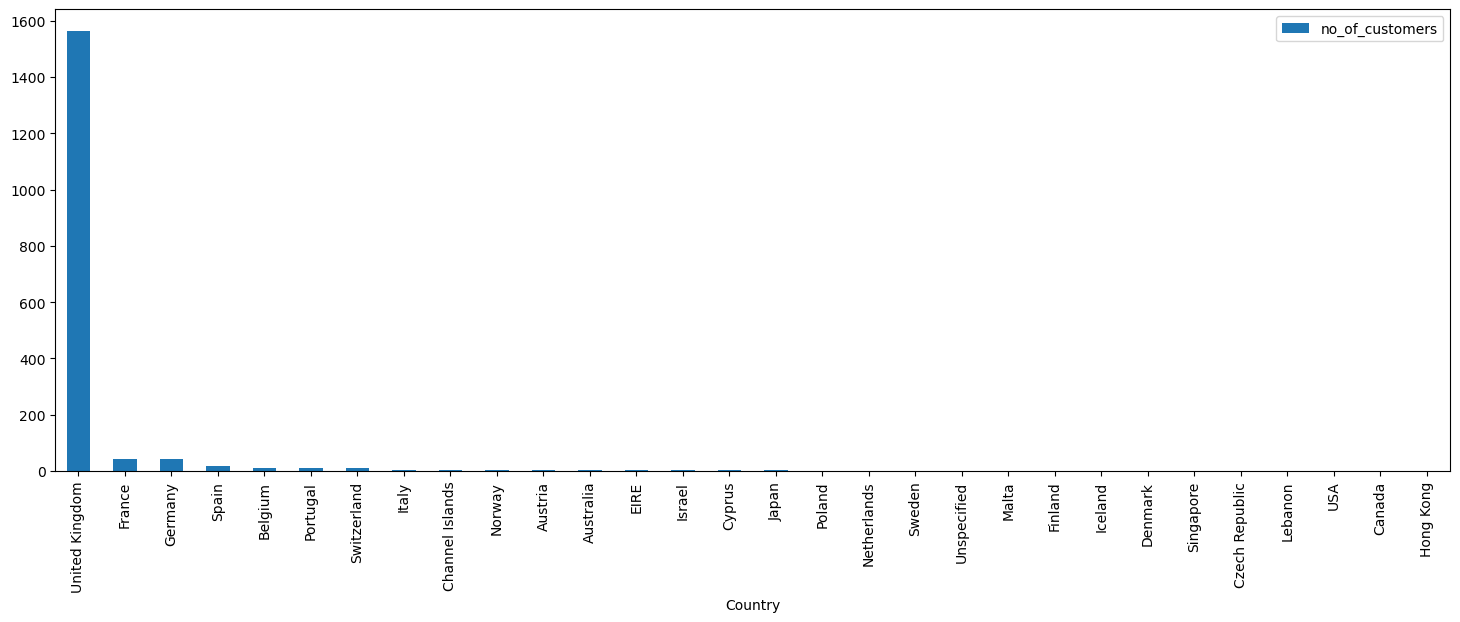

In [182]:
#Plott the df_country in bar plot
df_country.plot(kind = 'bar', figsize = (18,6))


In [183]:
df_items = df.groupby(['Country'])[['ItemDescription']].nunique()
#to rename column names
df_items.columns = ['no_of_items']
df_items = df_items.sort_values('no_of_items', ascending=False)
df_items

,no_of_items
Country,
United Kingdom,1822
France,83
Germany,72
EIRE,55
Spain,31
Switzerland,20
Australia,18
Belgium,17
Portugal,15


<AxesSubplot:xlabel='Country'>

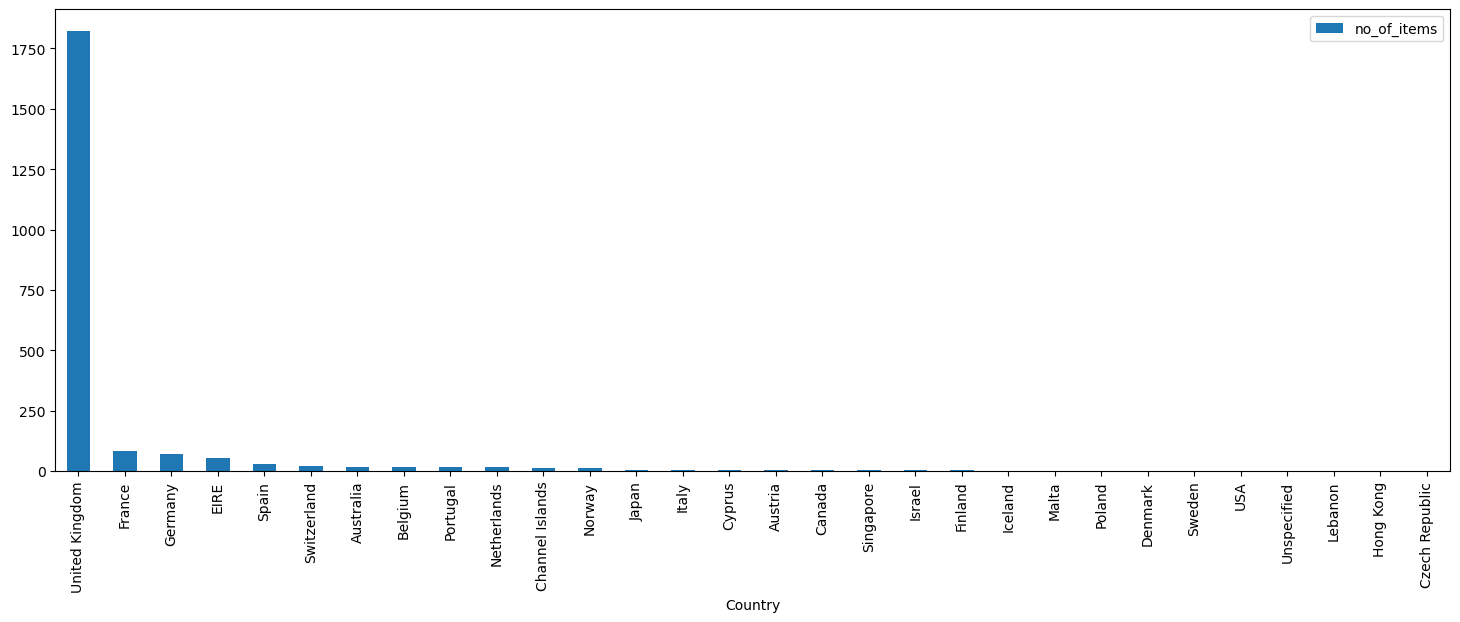

In [184]:
df_items.plot(kind = 'bar', figsize = (18,6))

In [185]:
#To select month and year alone in InvoiceDate
df['InvoiceYearMonth']= pd.to_datetime(df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [186]:
df.head(2)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country,InvoiceYearMonth
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11,70,United Kingdom,2019-02
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3,10,United Kingdom,2018-12


In [187]:
df_revenue = df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

#Looking at the first five rows
df_revenue.head(5)

,AmountSpent
InvoiceYearMonth,
2018-02,22204
2018-03,14439
2018-04,19652
2018-05,20309
2018-06,31748


<AxesSubplot:xlabel='InvoiceYearMonth'>

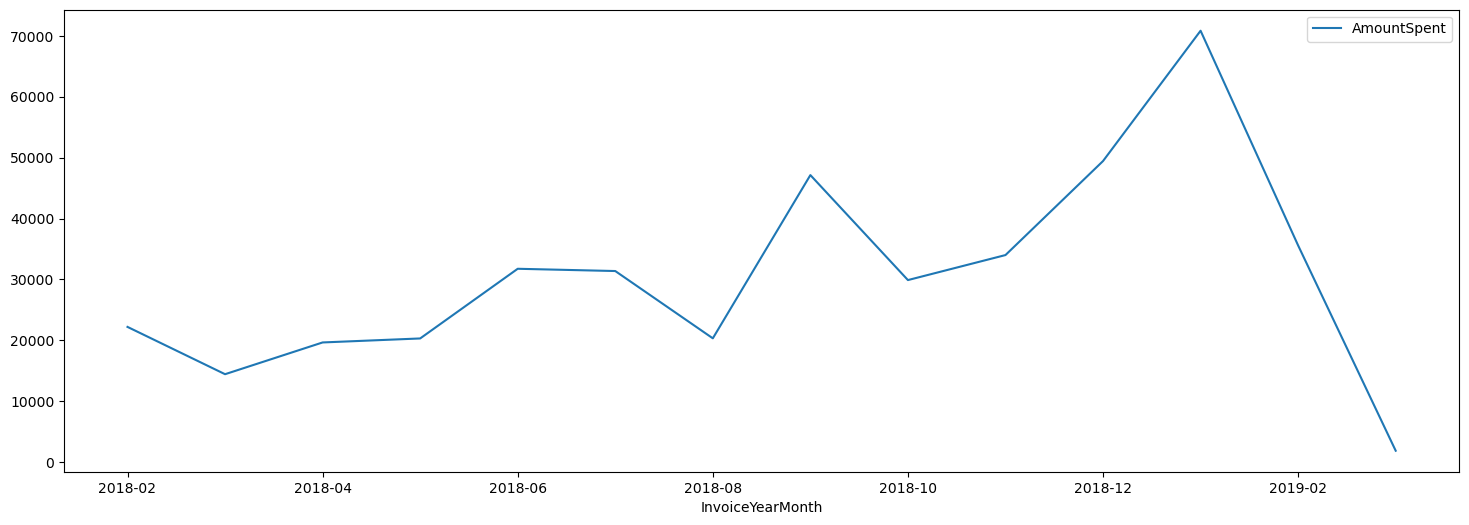

In [188]:
df_revenue.plot(kind='line', figsize = (18, 6))

In [189]:
df.head(5)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country,InvoiceYearMonth
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11,70,United Kingdom,2019-02
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3,10,United Kingdom,2018-12
2,267099,6385599,2019-02-15,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0,64,France,2019-02
3,380478,6044973,2018-06-22,459186,UNION JACK FLAG LUGGAGE TAG,3,1,5,United Kingdom,2018-06
4,1,6143225,2018-09-10,1733592,WASHROOM METAL SIGN,3,3,10,United Kingdom,2018-09


In [190]:
df_monthly_active  = df.groupby(['InvoiceYearMonth'])[['UserId']].nunique()
#to rename column names
df_monthly_active.columns = ['no_customer_per_month']
df_monthly_active = df_monthly_active.sort_values('no_customer_per_month', ascending=False)
df_monthly_active.head(5)

,no_customer_per_month
InvoiceYearMonth,
2019-01,391
2018-12,335
2019-02,293
2018-06,222
2018-11,221


<AxesSubplot:xlabel='InvoiceYearMonth'>

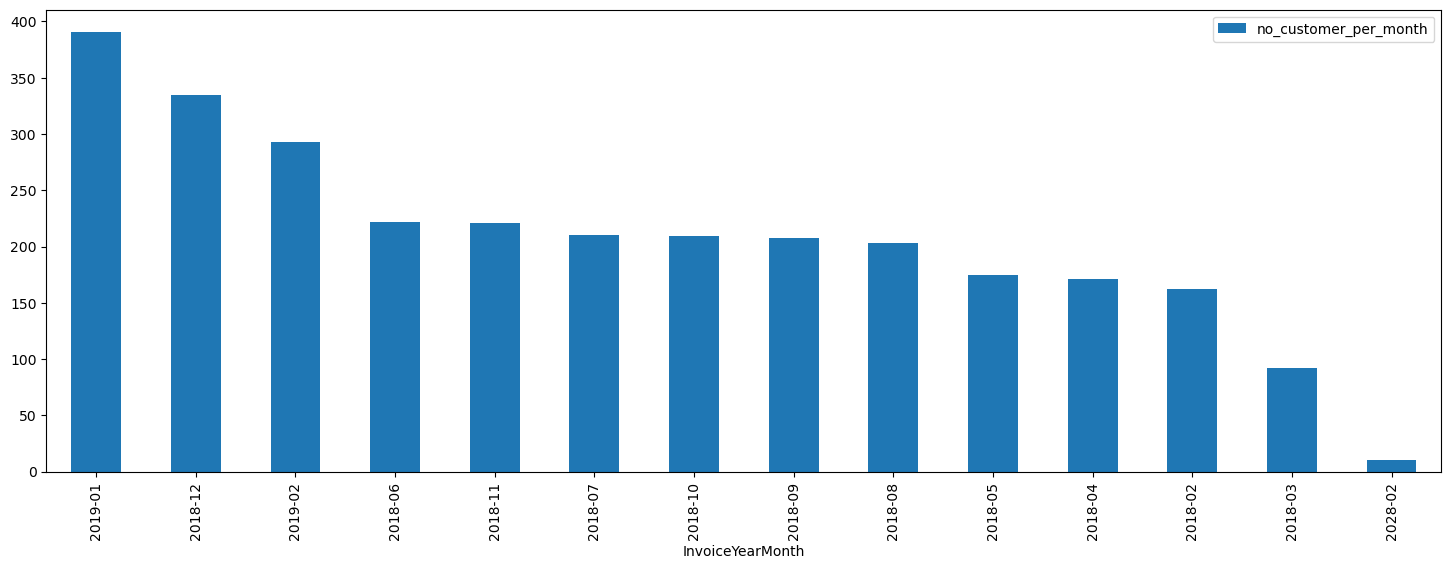

In [191]:
df_monthly_active.plot(kind='bar', figsize = (18, 6))

In [193]:
"""
Descriptive Analytics: shows that most of the customers of the online retail store are from the united kingdom. 
This implies most of the customers are in Europe

Diagnostic Analytics: There are more customers from Europe because the store has heavily marketed itself in Europe 
compared to other places

Predictive Analystics: The online retail Store will continue to get customers from United Kingdom since there is already 
a massive number of customer base in the United Kingdom 

Prescriptive Analytics: We can prescribe that the online retail store should invest in marketing in united kingdom  
since the number of conversions are very good there 
"""

'\nDescriptive Analytics: shows that most of the customers of the online retail store are from the united kingdom. \nThis implies most of the customers are in Europe\n\nDiagnostic Analytics: There are more customers from Europe because the store has heavily marketed itself in Europe \ncompared to other places\n\nPredictive Analystics: The online retail Store will continue to get customers from United Kingdom since there is already \na massive number of customer base in the United Kingdom \n\nPrescriptive Analytics: We can prescribe that the online retail store should invest in marketing in united kingdom  \nsince the number of conversions are very good there \n'